# Linear Dynamical System

In [1]:
using Plots
using Distributions
using LinearAlgebra
using DifferentialEquations

The model

$$
\begin{aligned}
    {\bf z}_{n+1} &= {\bf A}{\bf z}_{n} + \boldsymbol\varepsilon_{n}\\
    {\bf x}_{n+1} &= {\bf C}{\bf z}_{n+1} + \boldsymbol\varphi_{n}
\end{aligned}
$$

## Ordinary Differential Equation

In [2]:
A = [
    [0.1 -0.4];
    [1      0]
]

2×2 Array{Float64,2}:
 0.1  -0.4
 1.0   0.0

In [3]:
function f(du, u,p, t)
    du[1] = A[1, 1] * u[1] + A[1, 2] * u[2]
    du[2] = A[2, 1] * u[1] + A[2, 2] * u[2]
end

u0 = [0.1 -0.1]

T, Δt = 20, 0.01
tspan = (0.0, T)
system = ODEProblem(f, u0, tspan)
sol = solve(system);

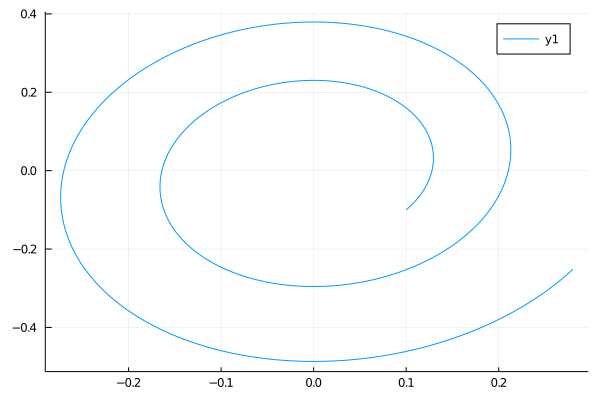

In [4]:
simulation = sol(0:Δt:T)
simulation = vcat(simulation.u...)
plot(simulation[:, 1], simulation[:, 2])

## Stochastic Differential Equation

In [10]:
A = [
    [0.1 -0.4];
    [1      0.1]
]

Γ = [
    [0.4   -0.8]
    [-0.5  0.5]
]

# Ensuring a positive-definite matrix
Γ = Γ * Γ'

2×2 Array{Float64,2}:
  0.8  -0.6
 -0.6   0.5

## The Euler–Maruyama method

$$
    {\bf X}_i = {\bf X}_{i-1} + a({\bf X}_{t-1}, t)\delta t + b({\bf X}_{t-1}, t)\delta {\bf W}_i
$$

In [15]:
function sde1(u0, A, Γ, n_path, n_steps)
    N = MvLogNormal([0, 0], Γ)
    sol = zeros(2, n_sims, n_steps)
    dt = T / n_steps
    
    un = u0
    for i=1:n_steps
        dW = rand(N, n_sims)
        un = (un + A * un * dt) .+  dW * sqrt(dt)
        sol[:, :, i] = un
    end
    
    return sol
end

sde1 (generic function with 1 method)

In [16]:
u0 = [0.2 -0.1]'
T = 20
n_sims = 50
n_steps = 100

sol = sde1(u0, A, Γ, n_sims, n_steps);

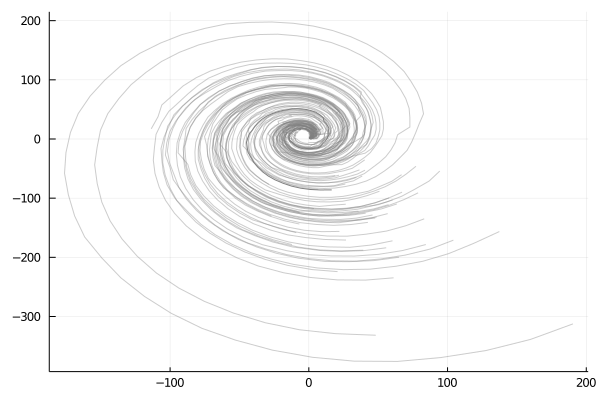

In [17]:
plot(sol[1, 1, :], sol[2, 1, :], c=:gray)
for s=2:n_sims
    plot!(sol[1, s, :], sol[2, s, :], color=:gray, alpha=0.4)
end
plot!(legend=nothing)

### The Kalman-Bucy process

In [38]:
A = [
    [-1   1];
    [-10 -1]
]


C = [
    [-1   0.4];
    [-1.5 -1]
]


Γ = [[1 0]; [0 1]]
Σ = [[1 0]; [0 1]]

z = zeros(2, 2)
muv = zeros(4)
Covm = [[Γ z]; [z Σ]]

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [48]:
z0 = [1.0 -1.5]'
W = MvNormal(muv, Covm)

M = [[A z]; [z C * A]]
vn = [z0; z0]

M * vn

4×1 Array{Float64,2}:
 -2.5
 -8.5
 -0.9000000000000001
 12.25

In [ ]:
function kalman_bucy(z0, A, C, Γ, Σ, n_sims, n_steps)
    muv = zeros(4)
Covm = [[Γ z]; [z Σ]]
end

In [15]:
function sde1(u0, A, Γ, n_sims, n_steps)
    N = MvLogNormal([0, 0], Γ)
    sol = zeros(2, n_sims, n_steps)
    dt = T / n_steps
    
    un = u0
    for i=1:n_steps
        dW = rand(N, n_sims)
        un = (un + A * un * dt) .+  dW * sqrt(dt)
        sol[:, :, i] = un
    end
    
    return sol
end

sde1 (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/msc-dissertation/notebooks/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/msc-dissertation/notebooks/tmp.gif")
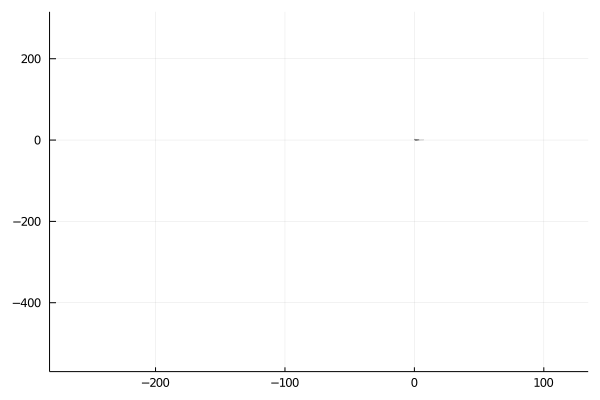

In [198]:
xmin, ymin = minimum(sol, dims=[2,3])
xmax, ymax = maximum(sol, dims=[2,3])

@gif for t=2:n_steps
    plot(legend=nothing)
    xlims!(xmin, xmax)
    ylims!(ymin, ymax)
    for s=1:n_sims
        plot!(sol[1, s, begin:t], sol[2, s, begin:t], color=:gray, alpha=0.4)
    end
end

## The Kalman-Filter equation

In [ ]:
A = [
    [-0.8 1.1];
    [2.3 -1.1]
] / 10

A = [
    [0 -0.9];
    [1 0]
]

C = [
    [1   0.6];
    [-0.4 1]
] 

C = I

m = zeros(2)
Γ = [
    [0.02 0.3]
    [-0.5  0.01]
] / 20

Γ = Γ * Γ'

epsn = MvNormal(m, Γ)

zn = [0.1; -0.1]
nsteps = 40
hist_array = zeros((2, nsteps, 2));

a, c = -0.02, -0.1

for n=1:nsteps
    zn = A * zn + rand(epsn)
    xn = C * zn
    
    hist_array[1, n, :] = zn
    hist_array[2, n, :] = xn
end

latent_x = hist_array[1, :, 1]
latent_y = hist_array[1, :, 2]

obs_x = hist_array[2, :, 1]
obs_y = hist_array[2, :, 2]

latent_x0, latent_y0 = hist_array[1, 1, :]
obs_x0, obs_y0 = hist_array[2, 1, :]

scatter([latent_x0], [latent_y0], label=nothing, color=:purple)
plot!(latent_x, latent_y, color=:purple, label="latent")

scatter!([obs_x0], [obs_y0], label=nothing, color=:teal)
plot!(obs_x, obs_y, color=:teal, label="observed")
plot!(legend=:outertopright)

In [ ]:
vmin, vmax = minimum(hist_array), maximum(hist_array)
@gif for n=1:nsteps
    scatter([latent_x0], [latent_y0], label=nothing, color=:purple)
    plot!(latent_x[begin:n], latent_y[begin:n], color=:purple, label="latent")

    scatter!([obs_x0], [obs_y0], label=nothing, color=:teal)
    plot!(obs_x[begin:n], obs_y[begin:n], color=:teal, label="observed")
    plot!(legend=:outertopright)

    xlims!(vmin, vmax)
    ylims!(vmin, vmax)
end

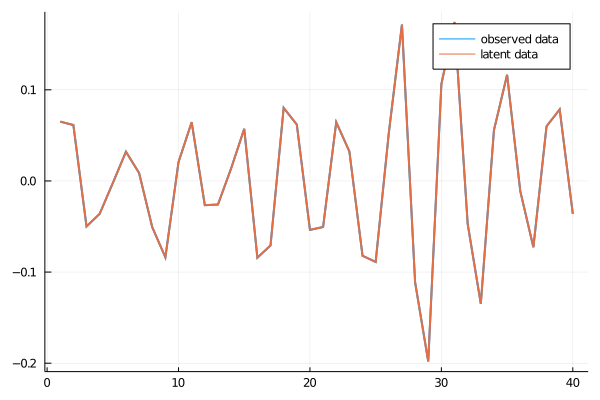

In [40]:
plot(obs_y, label="observed data", linewidth=2)
plot!(latent_y, label="latent data", linewidth=2)

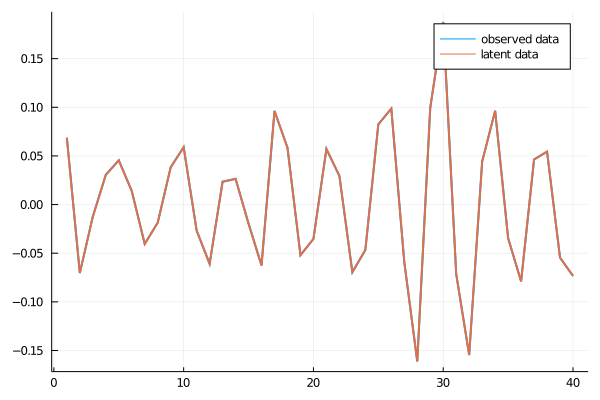

In [41]:
plot(obs_x, label="observed data", linewidth=2)
plot!(latent_x, label="latent data", linewidth=2)